<a href="https://colab.research.google.com/github/anvipati/personal-finance-dashboard/blob/main/Anvi_Finance_Tracker_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the sheet where your expenses live
df = pd.read_excel("Personal Finance Tracker.xlsx", sheet_name="Cleaned Finance Table")

# Preview it
print(df.head())

        Date       Category         Description   Amount Payment Method
0 2023-05-15  Miscellaneous  Paper Statement Fee    3.00     Debit Card
1 2023-06-06  Miscellaneous                  ATM   20.00     Debit Card
2 2023-10-04           Food           Cook Out      4.29     Debit Card
3 2023-10-08       Shopping         Ulta Beauty     5.35     Debit Card
4 2023-10-08           Food        Sassool Dates    2.25     Debit Card


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
df_cleaned = df[['Date', 'Category', 'Amount', 'Payment Method']]
df_cleaned.to_csv("cleaned_expenses.csv", index=False)

print(df_cleaned.head())


        Date       Category  Amount Payment Method
0 2023-05-15  Miscellaneous    3.00     Debit Card
1 2023-06-06  Miscellaneous   20.00     Debit Card
2 2023-10-04           Food    4.29     Debit Card
3 2023-10-08       Shopping    5.35     Debit Card
4 2023-10-08           Food    2.25     Debit Card


In [ ]:
df_cleaned['Month'] = df['Date'].dt.to_period('M').astype(str)
df_cleaned.to_csv("cleaned_expenses.csv", index=False)
print(df_cleaned.head())



        Date       Category  Amount Payment Method    Month
0 2023-05-15  Miscellaneous    3.00     Debit Card  2023-05
1 2023-06-06  Miscellaneous   20.00     Debit Card  2023-06
2 2023-10-04           Food    4.29     Debit Card  2023-10
3 2023-10-08       Shopping    5.35     Debit Card  2023-10
4 2023-10-08           Food    2.25     Debit Card  2023-10


In [ ]:
files.download("cleaned_expenses.csv")

In [ ]:
import matplotlib.pyplot as plt

# Monthly totals
monthly_summary = df_cleaned.groupby('Month')['Amount'].sum().reset_index()
print("Monthly Summary:")
print(monthly_summary)

# Category totals
category_summary = df_cleaned.groupby('Category')['Amount'].sum().reset_index()
print("\nCategory Summary:")
print(category_summary)


Monthly Summary:
     Month  Amount
0  2023-05    3.00
1  2023-06   20.00
2  2023-10   59.38
3  2023-11   40.78
4  2023-12   36.92
5  2024-01   30.31
6  2024-02   90.36
7  2024-03   16.90
8  2024-04   15.58

Category Summary:
        Category  Amount
0  Entertainment    1.06
1           Food  273.82
2  Miscellaneous   33.00
3       Shopping    5.35


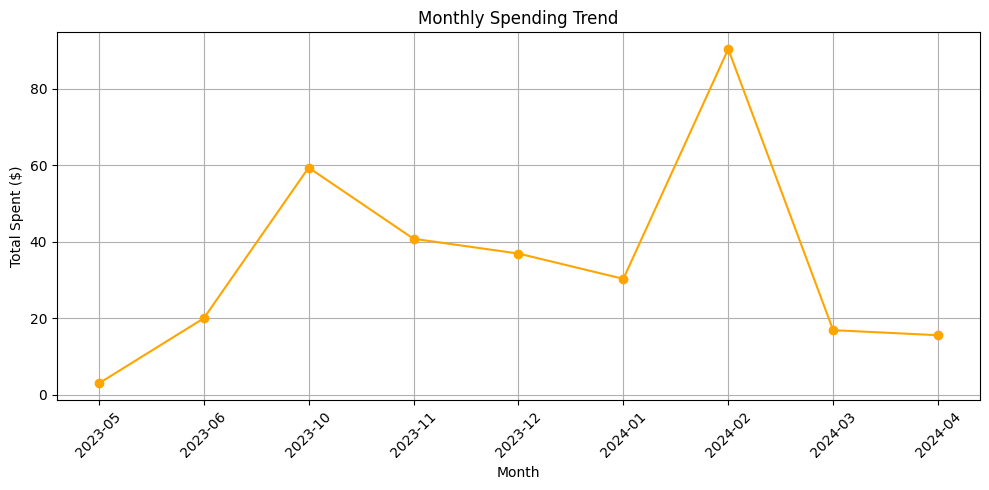

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['Month'], monthly_summary['Amount'], marker='o', color='orange')
plt.title('Monthly Spending Trend')
plt.xlabel('Month')
plt.ylabel('Total Spent ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('monthly_trends.png')

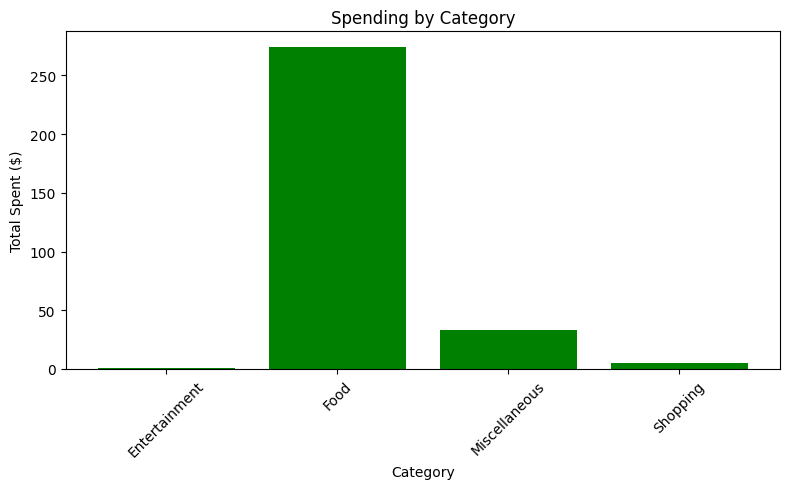

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(category_summary['Category'], category_summary['Amount'], color='green')
plt.title('Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('Category_trends.png')


In [ ]:
monthly_summary['Goal'] = 50
monthly_summary['Difference'] = monthly_summary['Goal'] - monthly_summary['Amount']

print(monthly_summary[['Month', 'Amount', 'Goal', 'Difference']])

     Month  Amount  Goal  Difference
0  2023-05    3.00    50       47.00
1  2023-06   20.00    50       30.00
2  2023-10   59.38    50       -9.38
3  2023-11   40.78    50        9.22
4  2023-12   36.92    50       13.08
5  2024-01   30.31    50       19.69
6  2024-02   90.36    50      -40.36
7  2024-03   16.90    50       33.10
8  2024-04   15.58    50       34.42


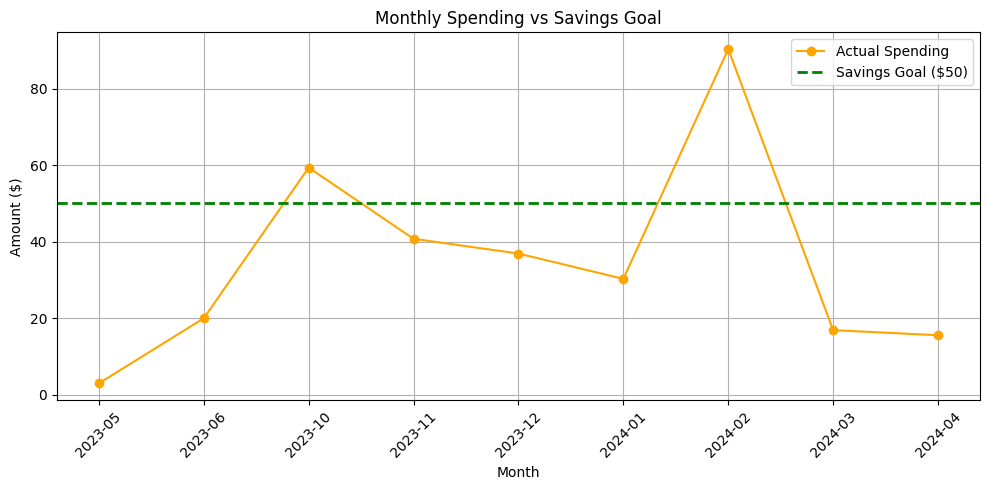

In [ ]:
import matplotlib.pyplot as plt

# Plot monthly spending
plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['Month'], monthly_summary['Amount'], marker='o', color='orange', label='Actual Spending')

# Add goal line
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Savings Goal ($50)')

# Titles and labels
plt.title('Monthly Spending vs Savings Goal')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()